In [1]:
# I load the needed libraries
library(dplyr)
library(scales)
library(GoFKernel)

library(mvtnorm)
library(gplots)

options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: KernSmooth

KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




# Preparation of the simulation

I load the functions from the class file:


In [2]:
source("class_MCMC.R")

I define then the function that I want to use as output of the MCMCs:

In [3]:
# Function to sampled from: n-dim gaussian with chosen sigmas and centers
# posterior_g_inhom = function (theta) {

#     sigmas = c(1:length(theta))
#     centers = c(seq(length(theta), 1))

#     product = 1
#     for (i in 1:length(theta)) {
#         product = product * exp(-(theta[i] - centers[i])**2/sigmas[i]**2)
#     }

#     return (product)

# }

cauchy2_gauss1 = function (theta) {

    sigmas = 2.5
    centers = 0.4

    product = exp(-(theta[1] - centers)**2/sigmas**2)

    product = product * (dcauchy(theta[2], -5, 2) + 4*dcauchy(theta[2], 8, 3))

    product = product * (dcauchy(theta[3], -10, 2) + 4*dcauchy(theta[3], 10, 4))

    return (product)

} 

chosen_function = cauchy2_gauss1

Then I only have to determine the parameters for the initialization = the "hyperparameters" of the simulations

In [4]:
# The initial parameters are:
init = c(4, 4, 4)
std = diag(1, 3)

N = as.integer(1e5)
burn_in = as.integer(1e4)

print_step = as.integer(1e2)
# print_init = as.integer(1e3)

N_tot = N + burn_in

# For Haario:
epsilon = 0.001


# Simulations

Acceptance rate =  77.37455 %


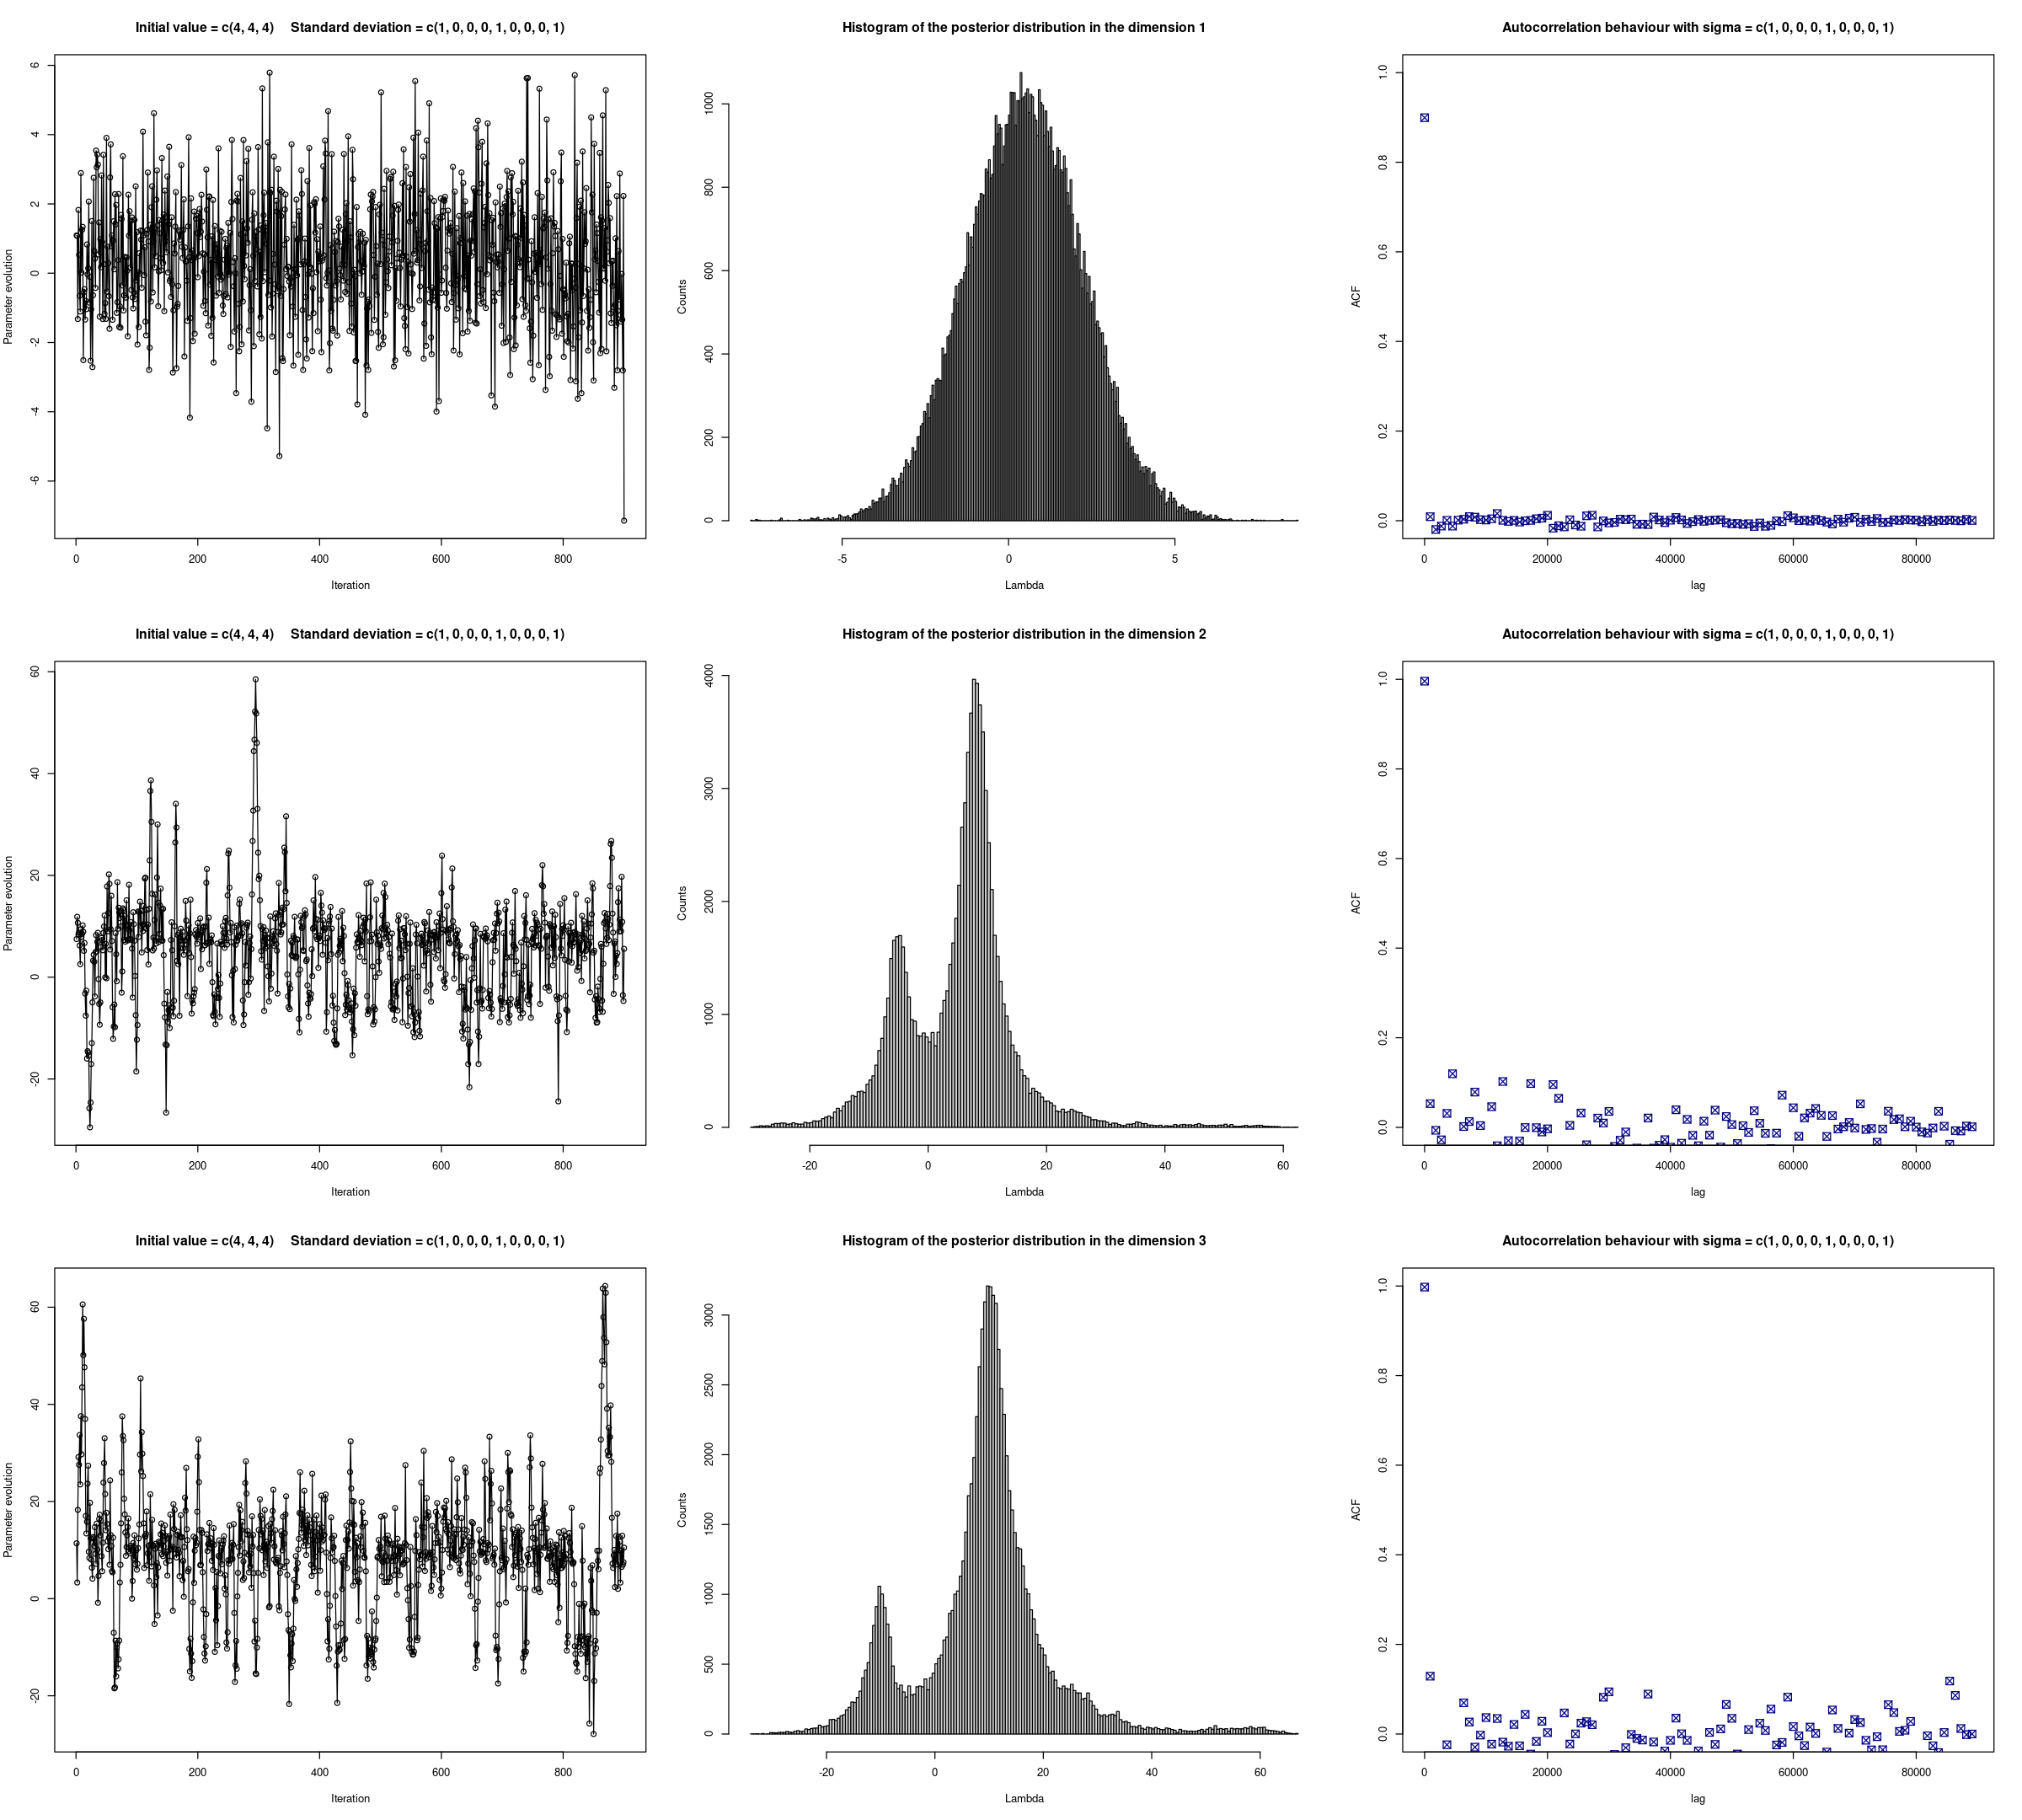

In [5]:
# MVTNORM 

# Evaluate then the MCMC
mcmc_g = random_steps_mvtnorm (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

# Selecting the sequence after the burn-in
mcmc_g = mcmc_g[burn_in:N, ]

# Plotting the results
show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  84.48394 %


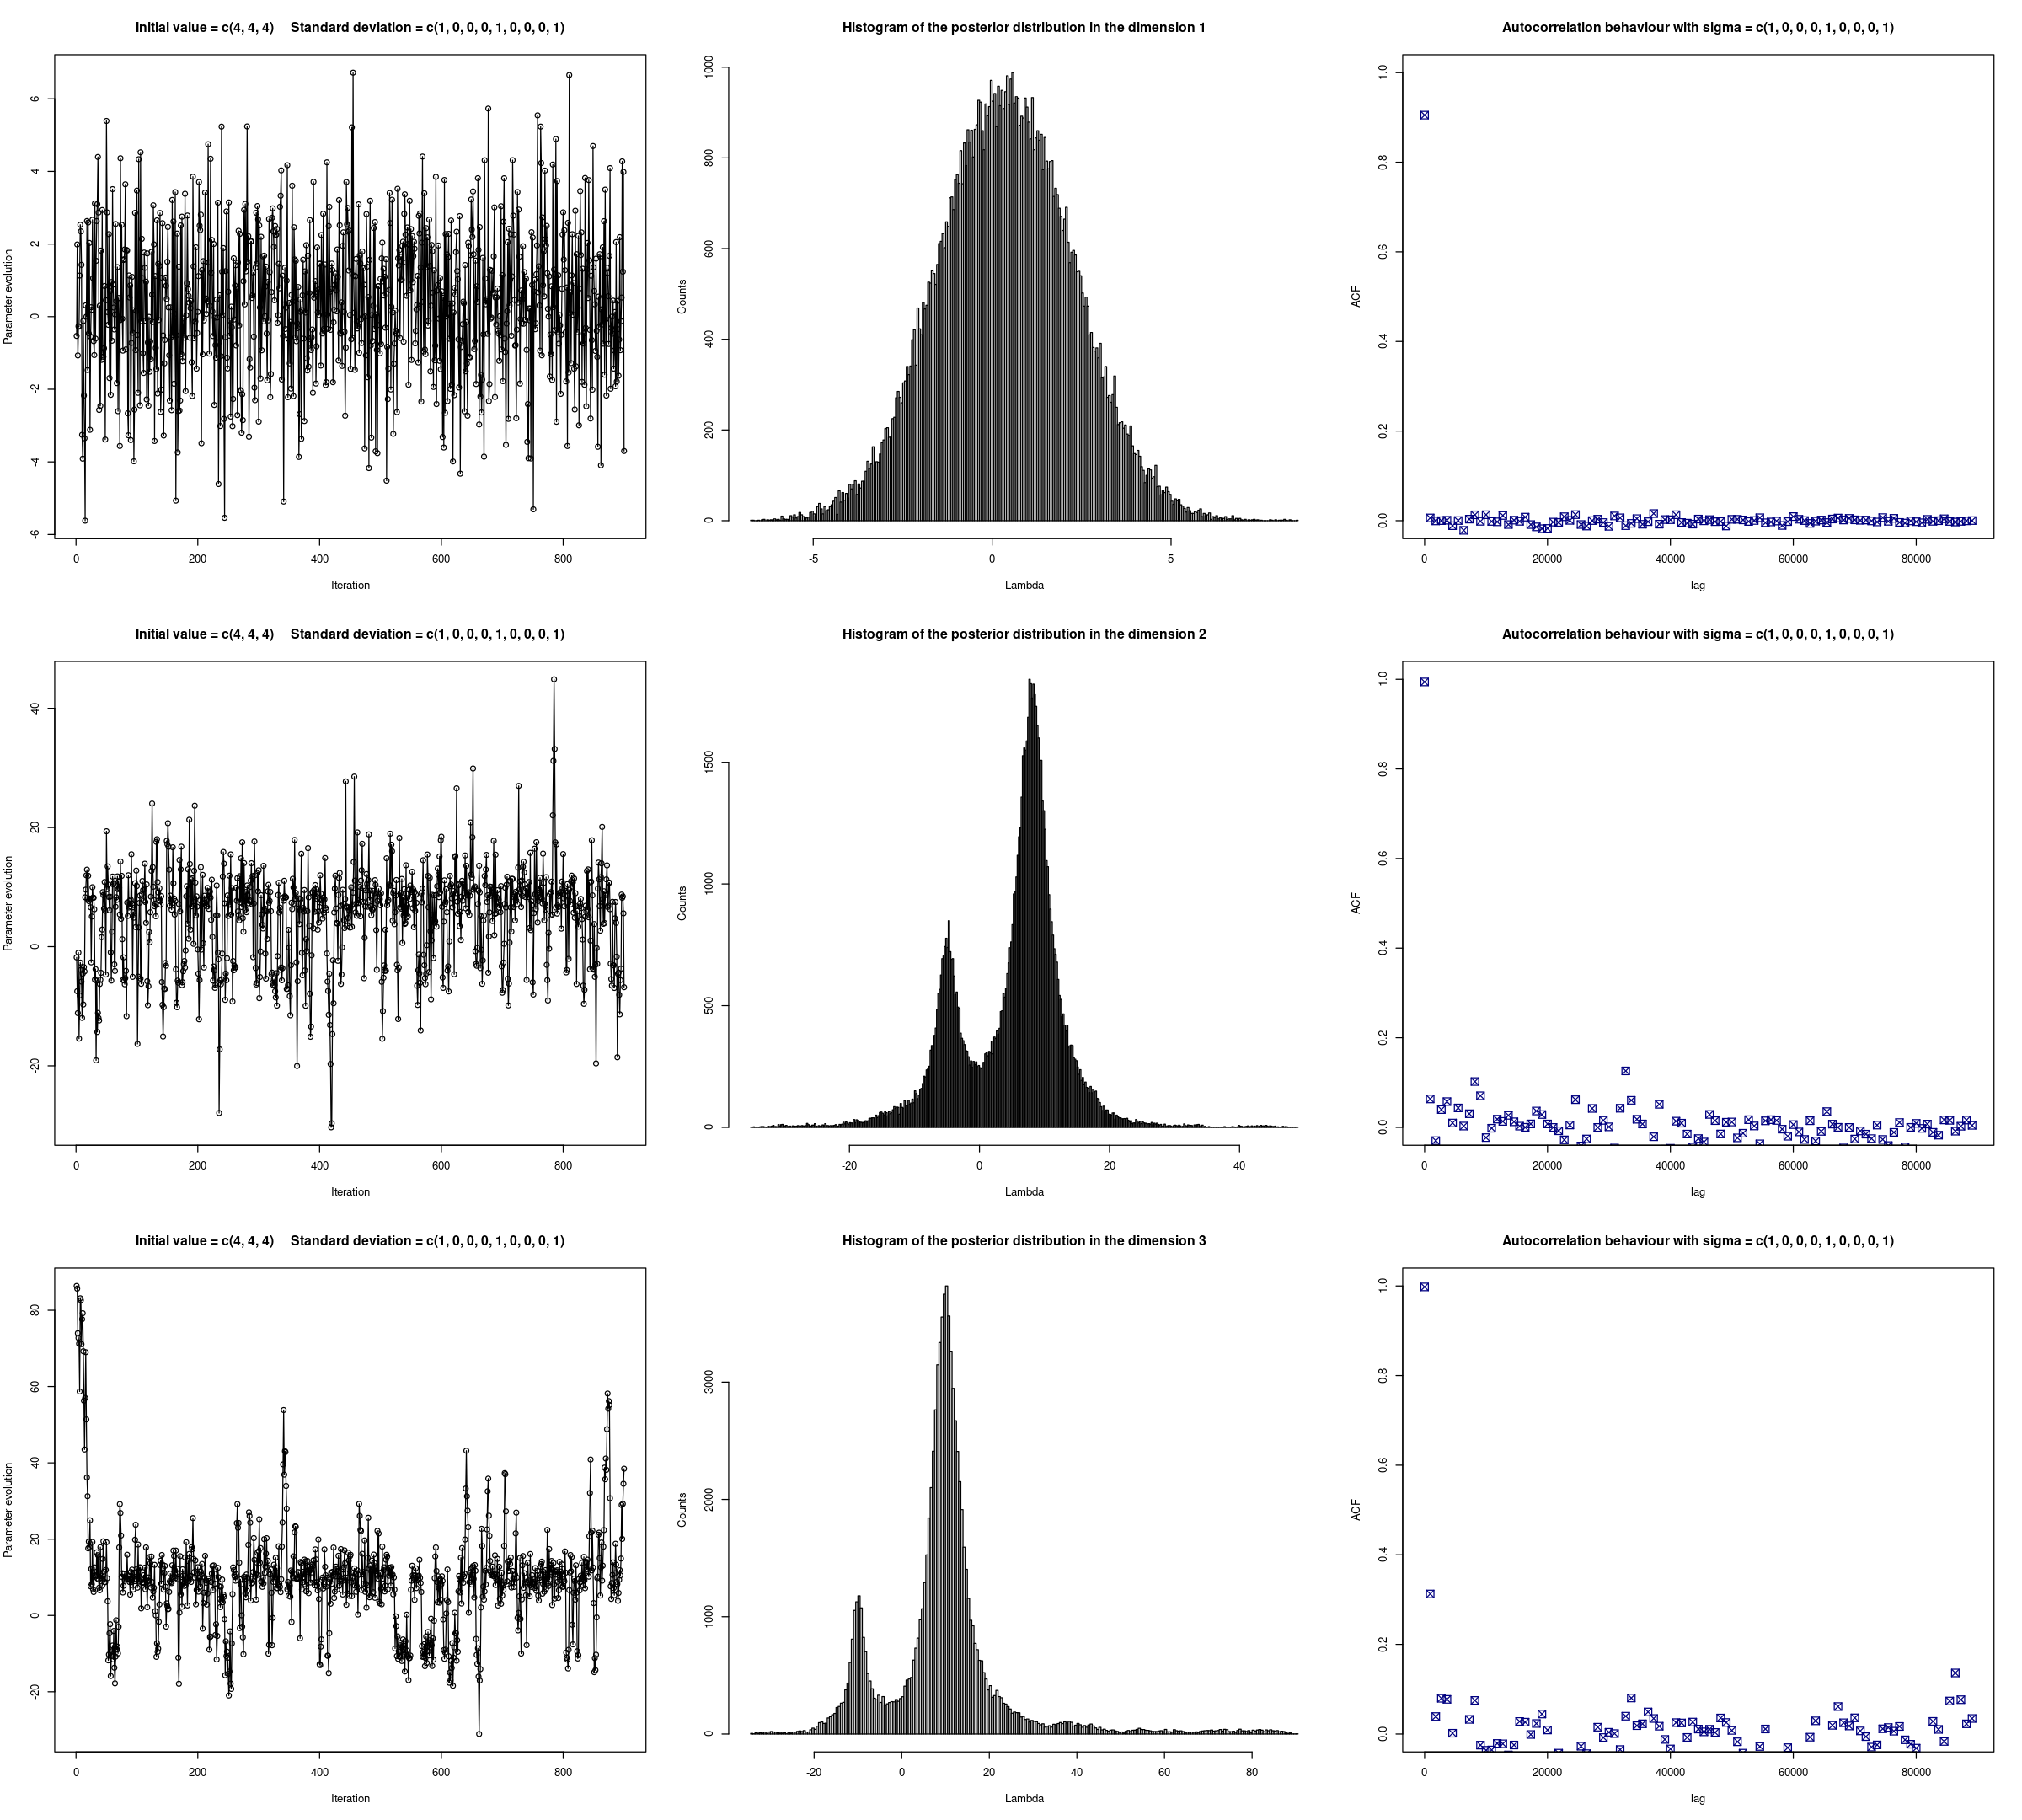

In [6]:
# MVTNORM GIBBS

mcmc_g = random_steps_mvtnorm_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [7]:
# # SIMPLE ADAPTIVE

# mcmc_g = random_steps_simple (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

In [8]:
# # SIMPLE ADAPTIVE GIBBS

# mcmc_g = random_steps_simple_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
#                                 gamma_function = gamma_series_exp, halved_step = burn_in)

# mcmc_g = mcmc_g[burn_in:N, ]

# show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  16.30636 %
Final mean =  0.4142837 11.64527 8.856696 
Final covariance matrix = 
          [,1]       [,2]        [,3]
[1,]  6.127537   14.23052    4.719646
[2,] 14.230522 6536.97072  177.704768
[3,]  4.719646  177.70477 7339.047911


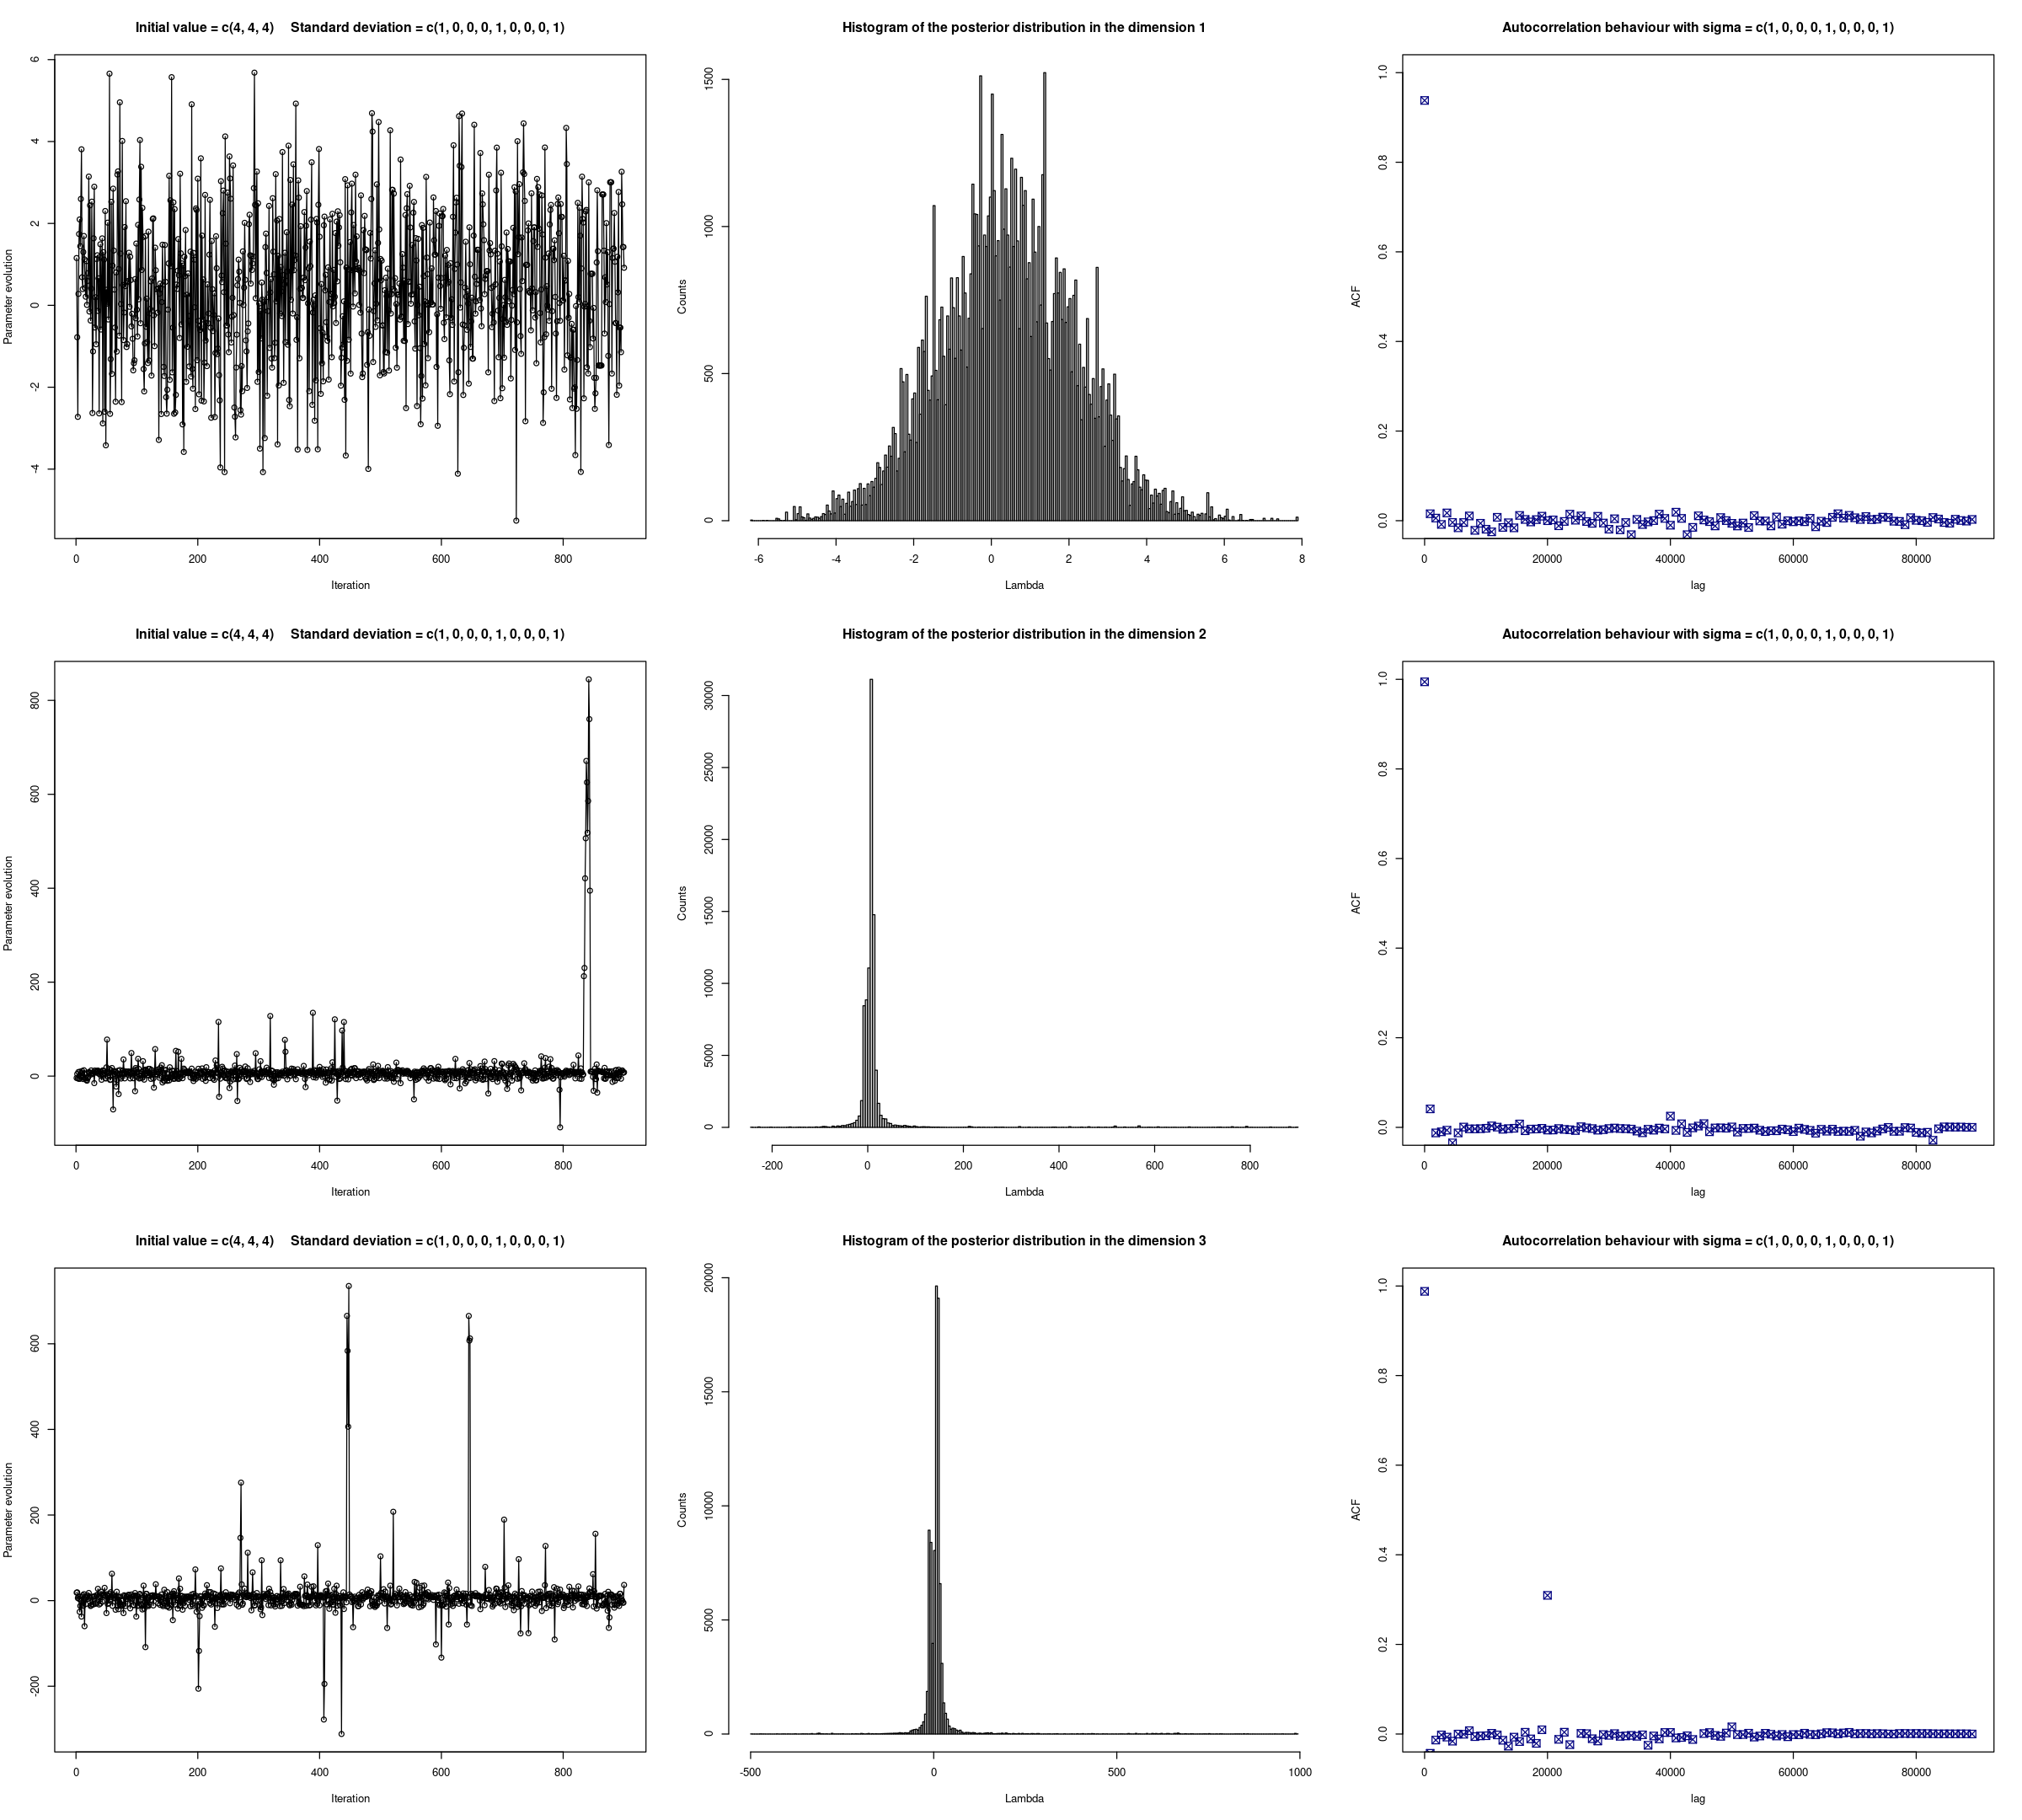

In [9]:
# HAARIO

mcmc_g = random_steps_haario (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  35.25242 %
Final mean =  0.3802284 3.669596 6.237111 
Final covariance matrix = 
         [,1]        [,2]       [,3]
[1,] 6.670707    5.330573   7.957191
[2,] 5.330573 4411.848581  98.481169
[3,] 7.957191   98.481169 605.666570


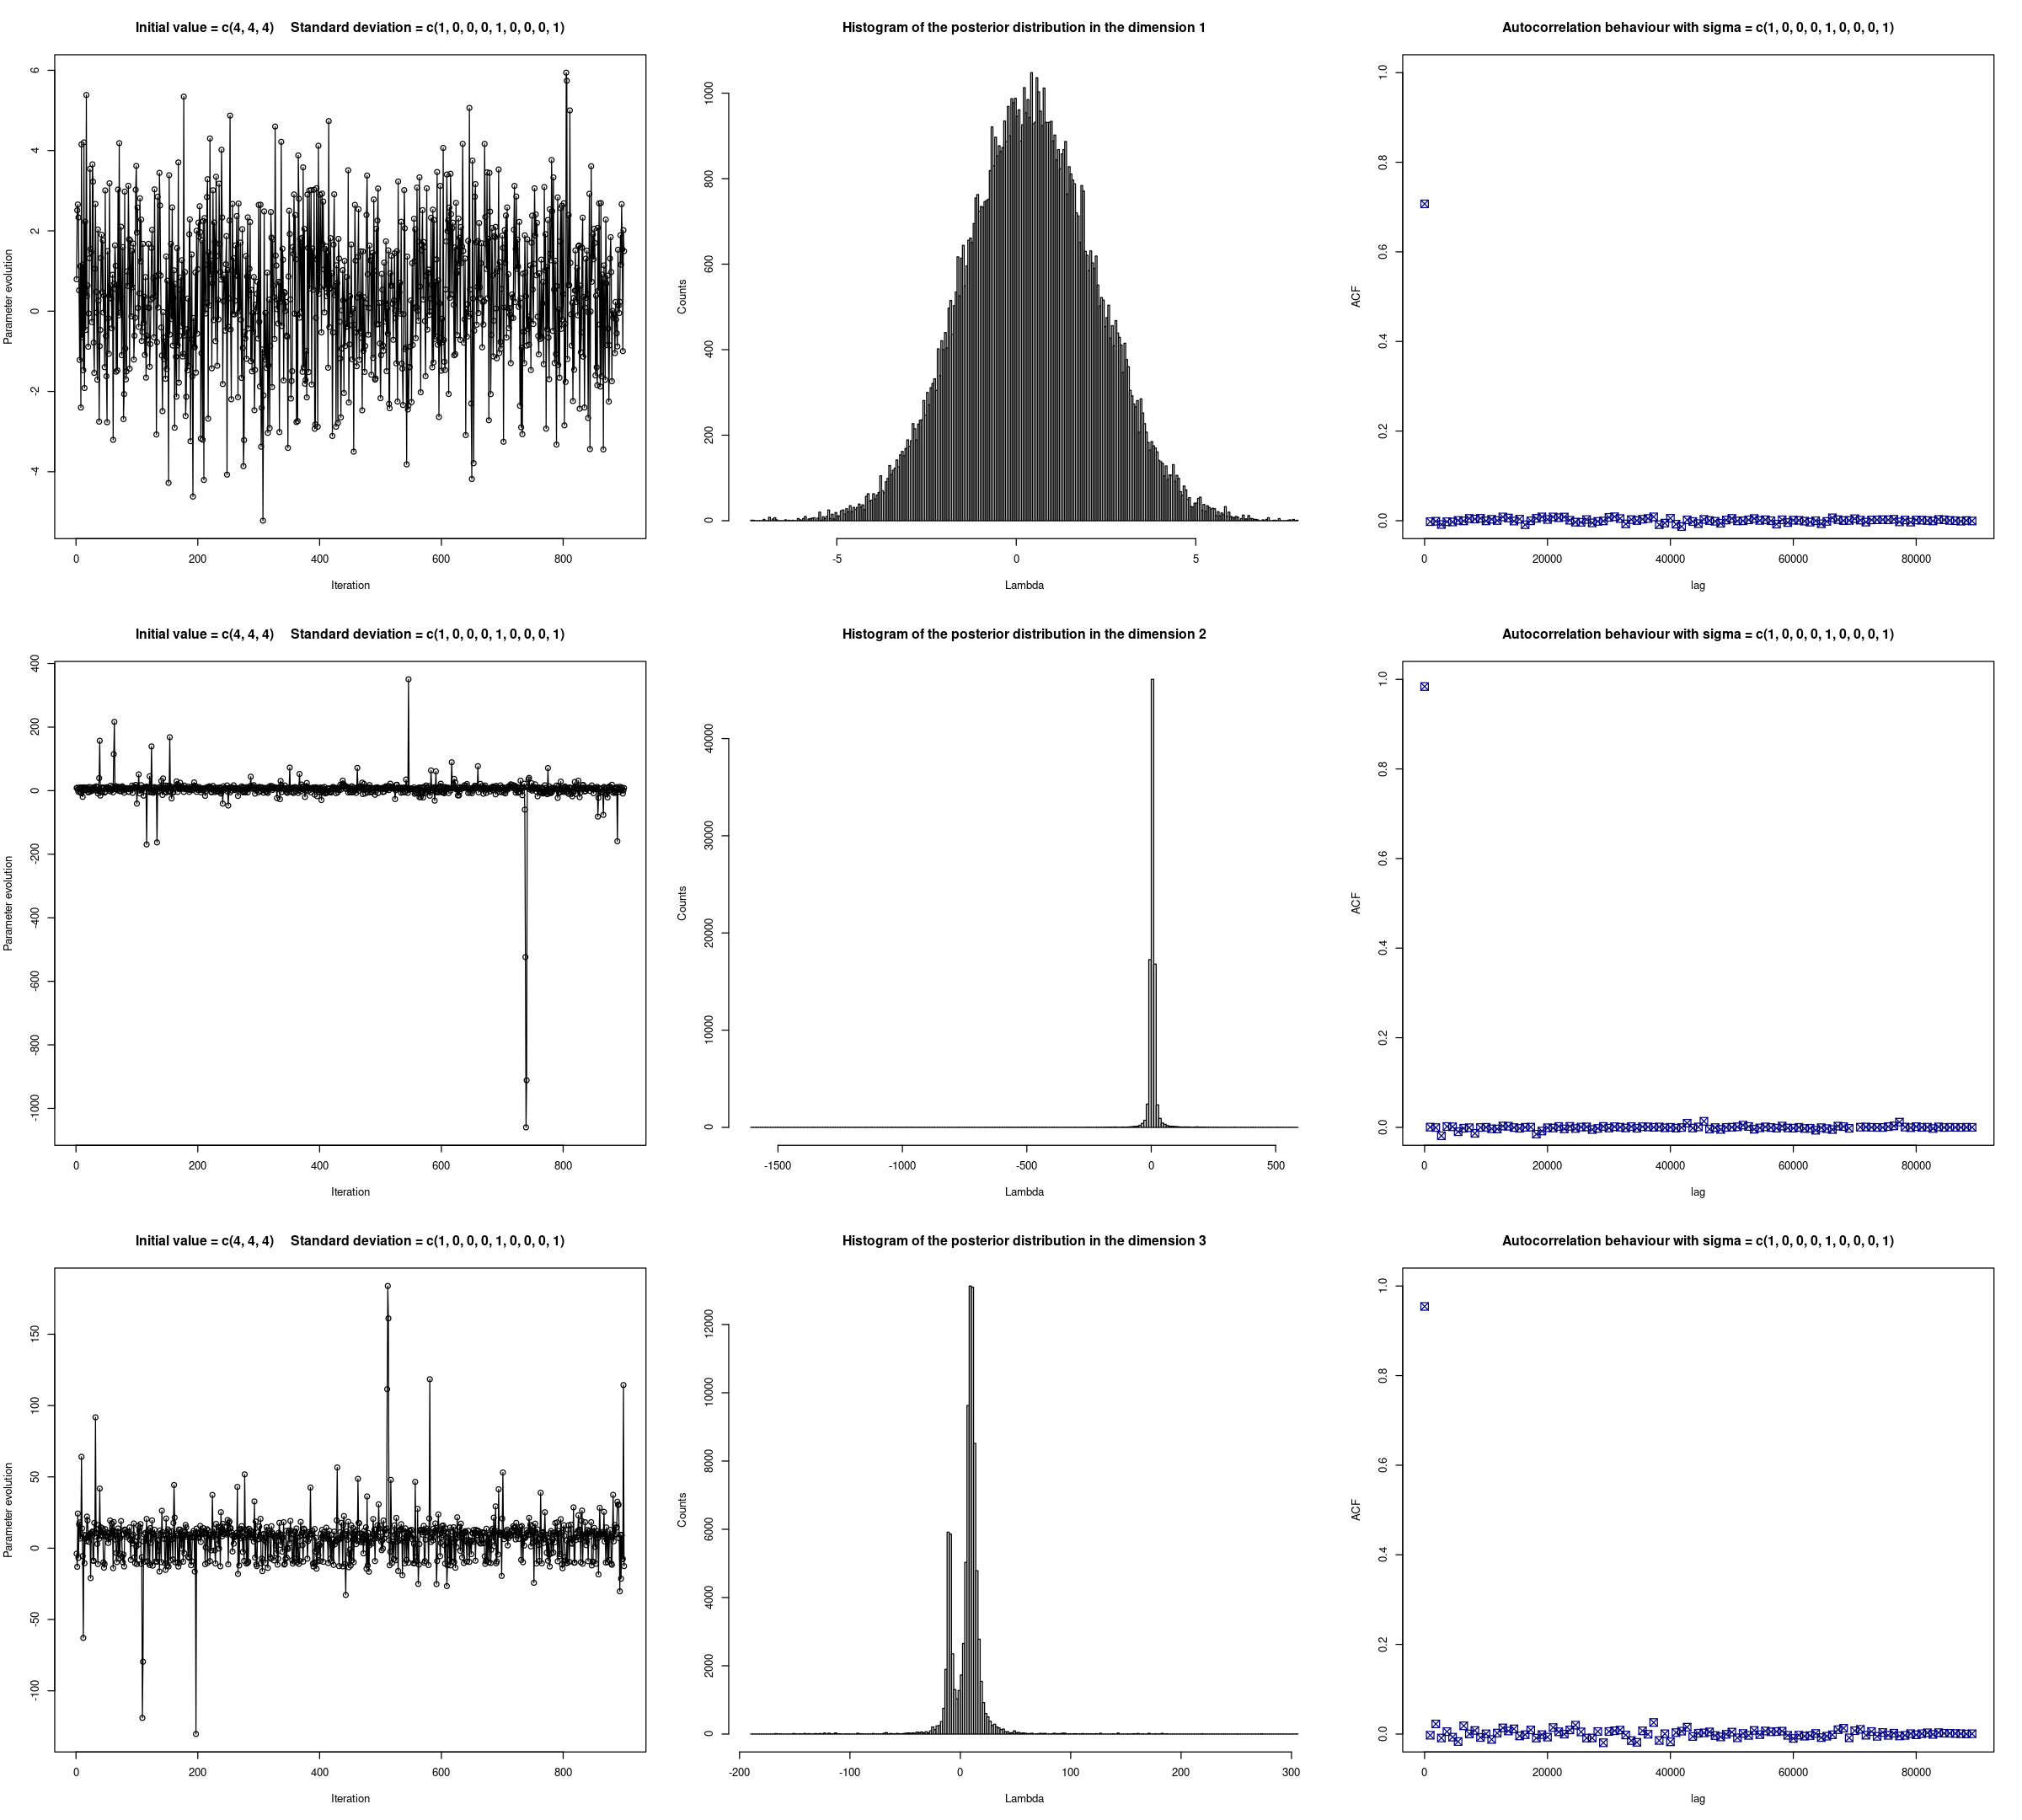

In [10]:
# HAARIO GIBBS

mcmc_g = random_steps_haario_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot,
                                    sigma = std, print_accept=TRUE, t_0 = burn_in, eps = epsilon)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  34.76182 %
Final mean =  0.3884587 5.825099 3.956801 
Final covariance matrix = 
            [,1]         [,2]         [,3]
[1,]  3.10642586  -0.06076062   -0.2591828
[2,] -0.06076062 430.10610607    3.3850769
[3,] -0.25918283   3.38507690 1388.7943298


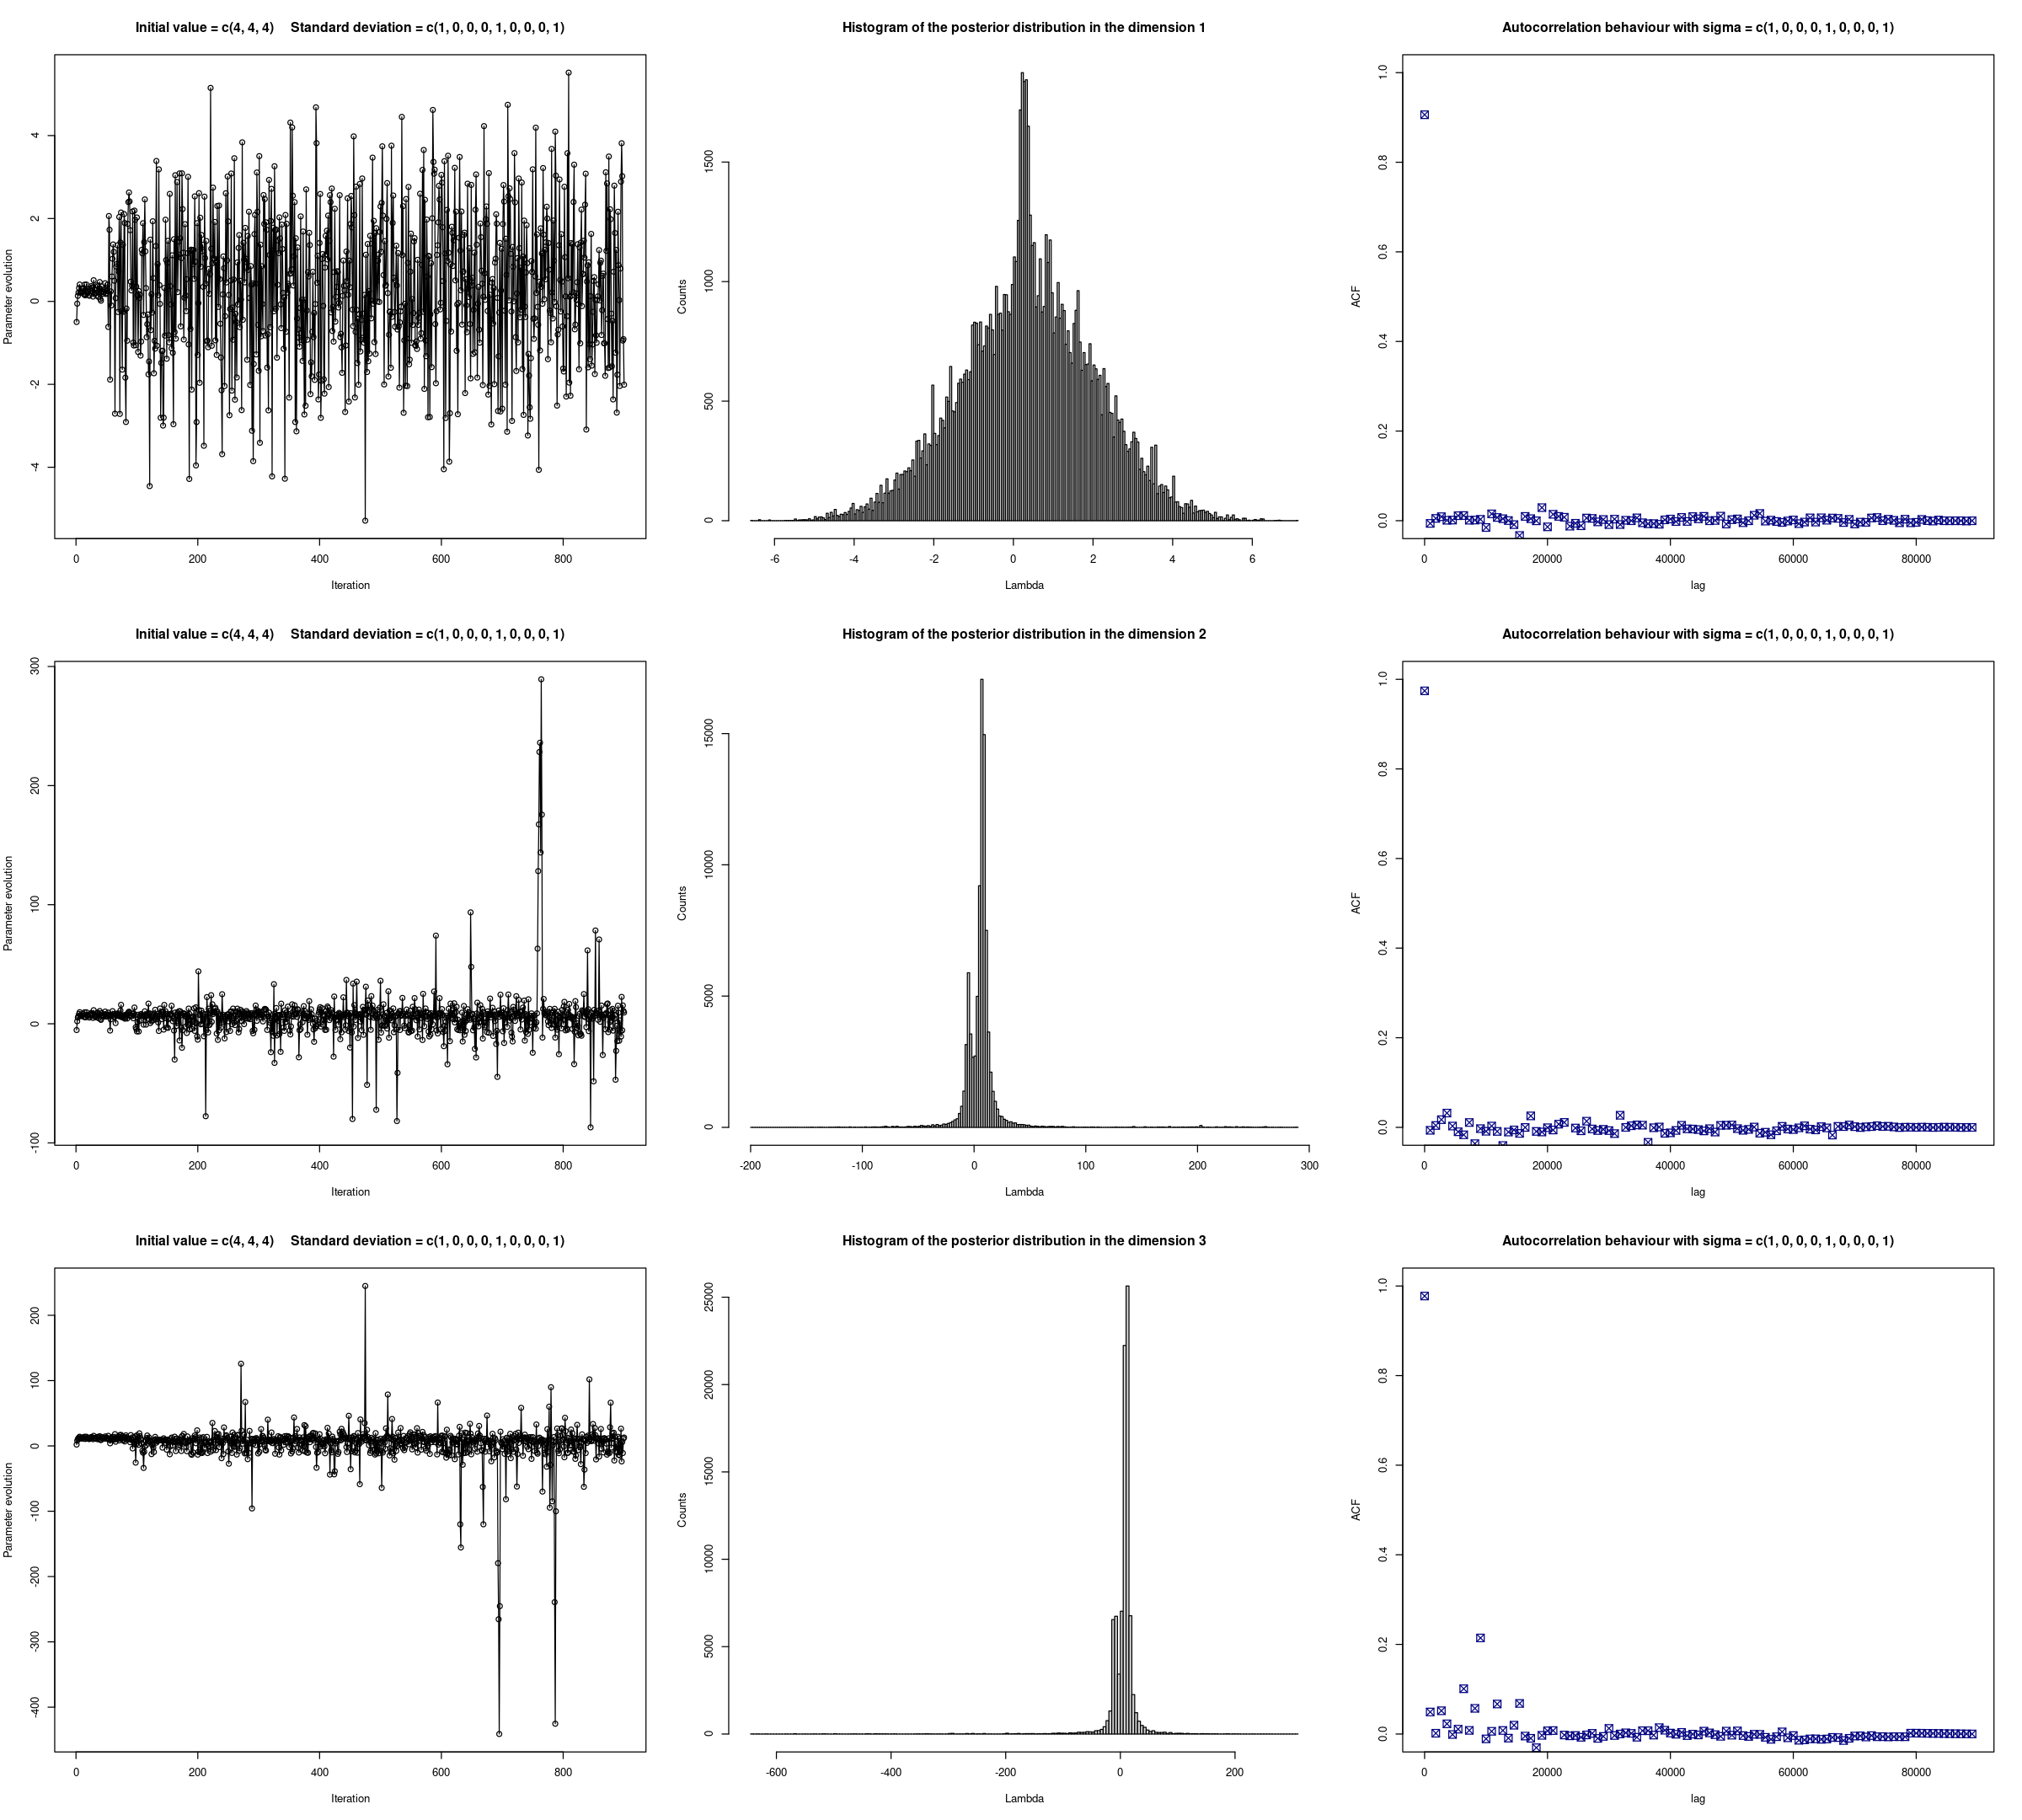

In [11]:
# RAO

mcmc_g = random_steps_AM_rao (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  54.06758 %
Final mean =  0.379198 5.632687 6.896776 
Final covariance matrix = 
            [,1]        [,2]         [,3]
[1,]  3.74641928  -0.2950671   0.02977541
[2,] -0.29506709 147.2360341   3.55481120
[3,]  0.02977541   3.5548112 158.88098807


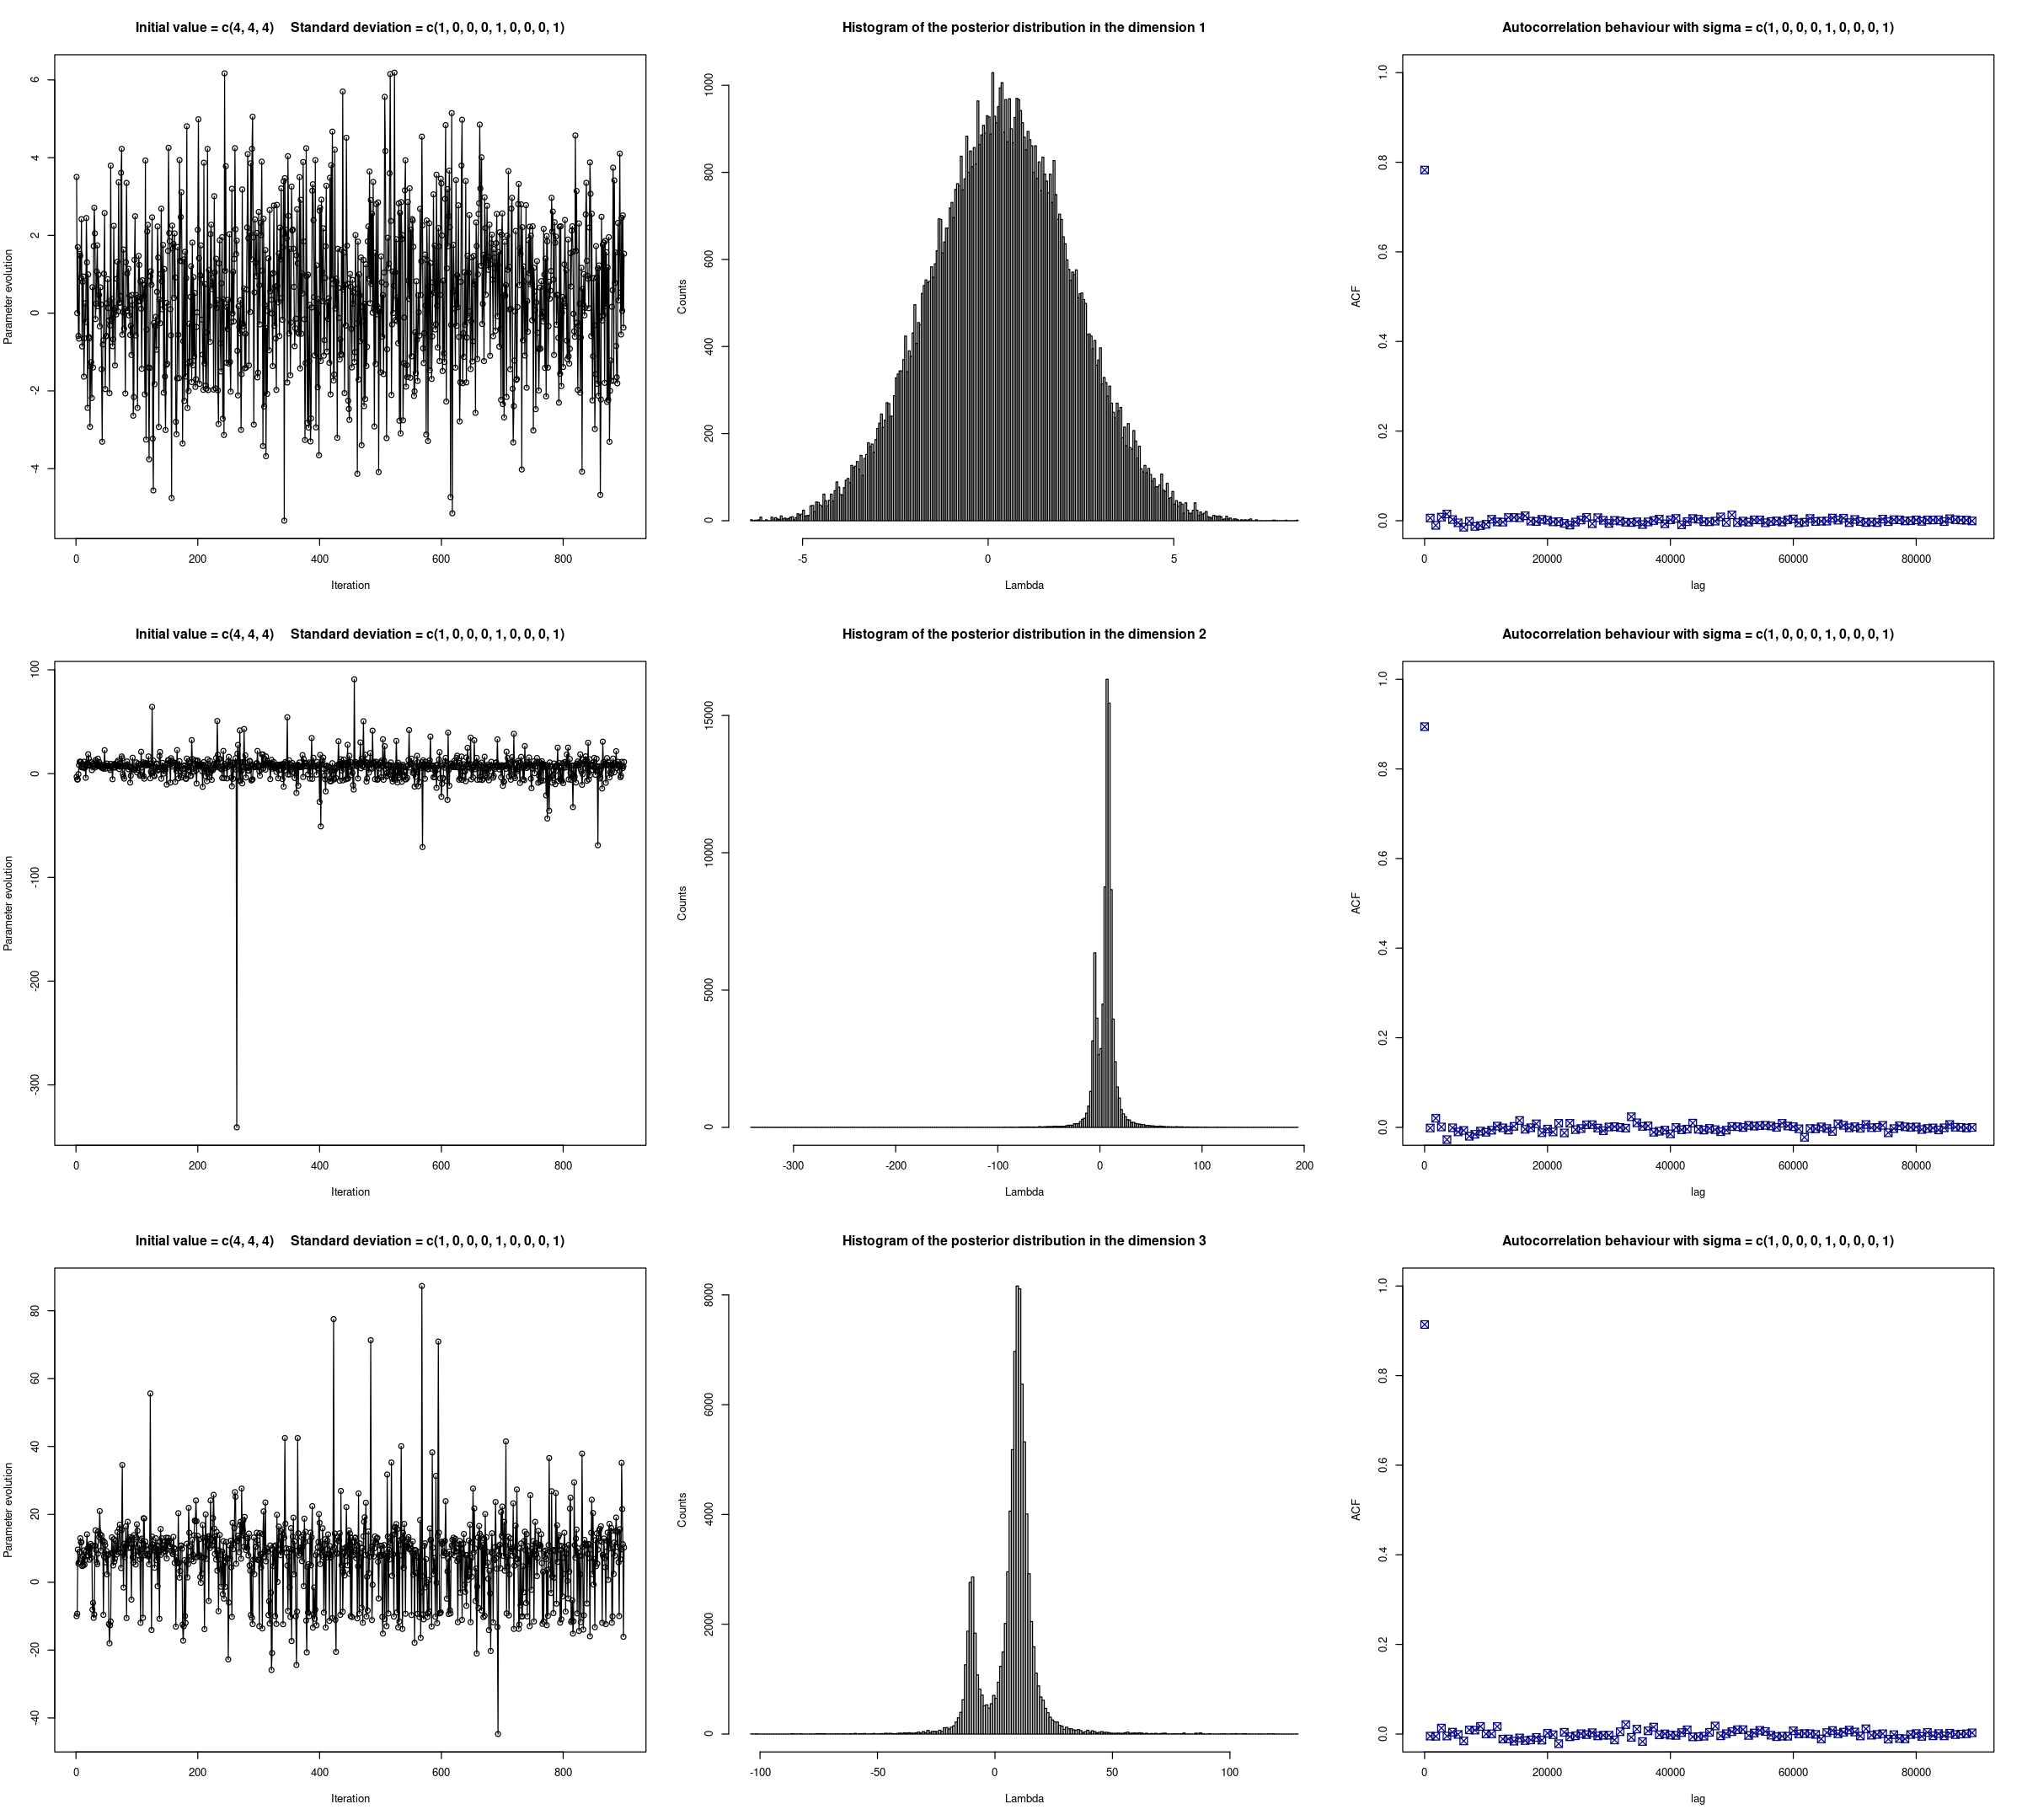

In [12]:
# RAO GIBBS

mcmc_g = random_steps_AM_rao_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in/2)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  65.24455 %
Final mean =  0.3176337 6.165306 4.794063 
Final lambda =  -1.517826 
Final covariance matrix = 
          [,1]       [,2]        [,3]
[1,] 3.4388795  0.8060161   0.5074245
[2,] 0.8060161 59.9388453   5.8270945
[3,] 0.5074245  5.8270945 188.4382170


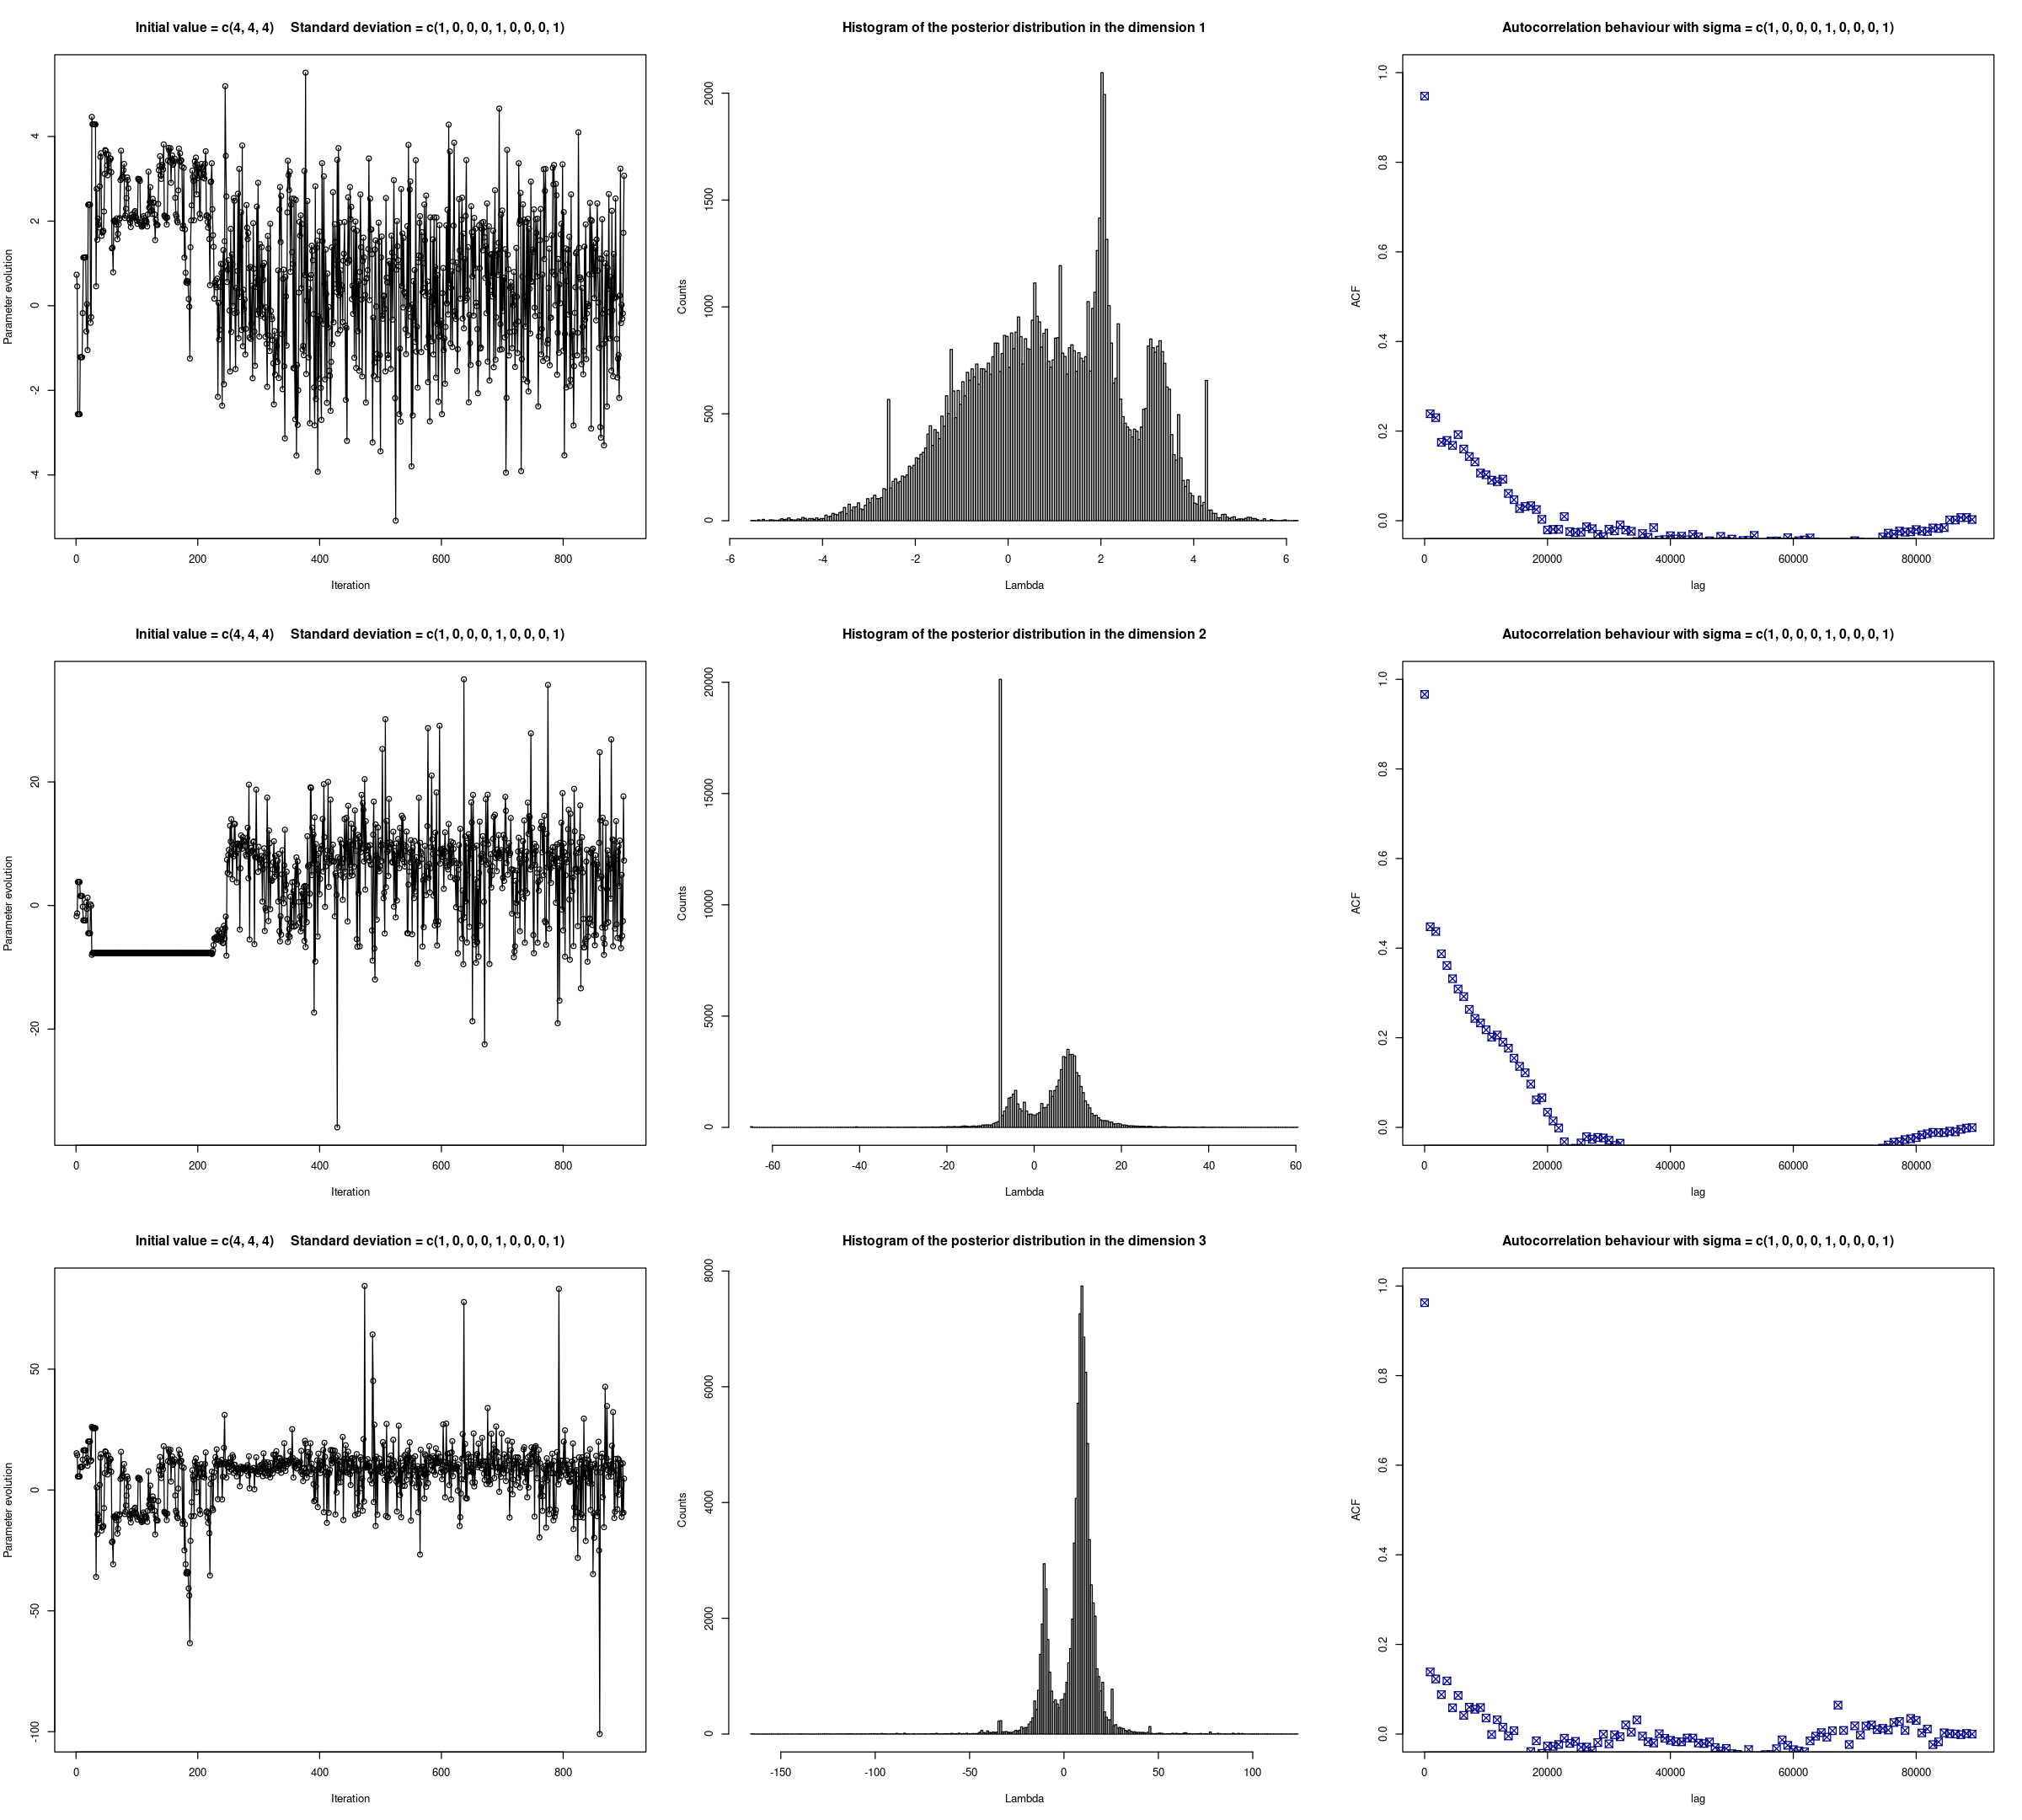

In [13]:
# GLOBAL

mcmc_g = random_steps_global (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)

Acceptance rate =  73.94606 %
Final mean =  0.4151691 5.691392 7.849478 
Final lambda =  -2.208408 
Final covariance matrix = 
          [,1]       [,2]       [,3]
[1,]  3.540154  -1.055286   1.292094
[2,] -1.055286  87.702967 -10.774998
[3,]  1.292094 -10.774998  65.853936


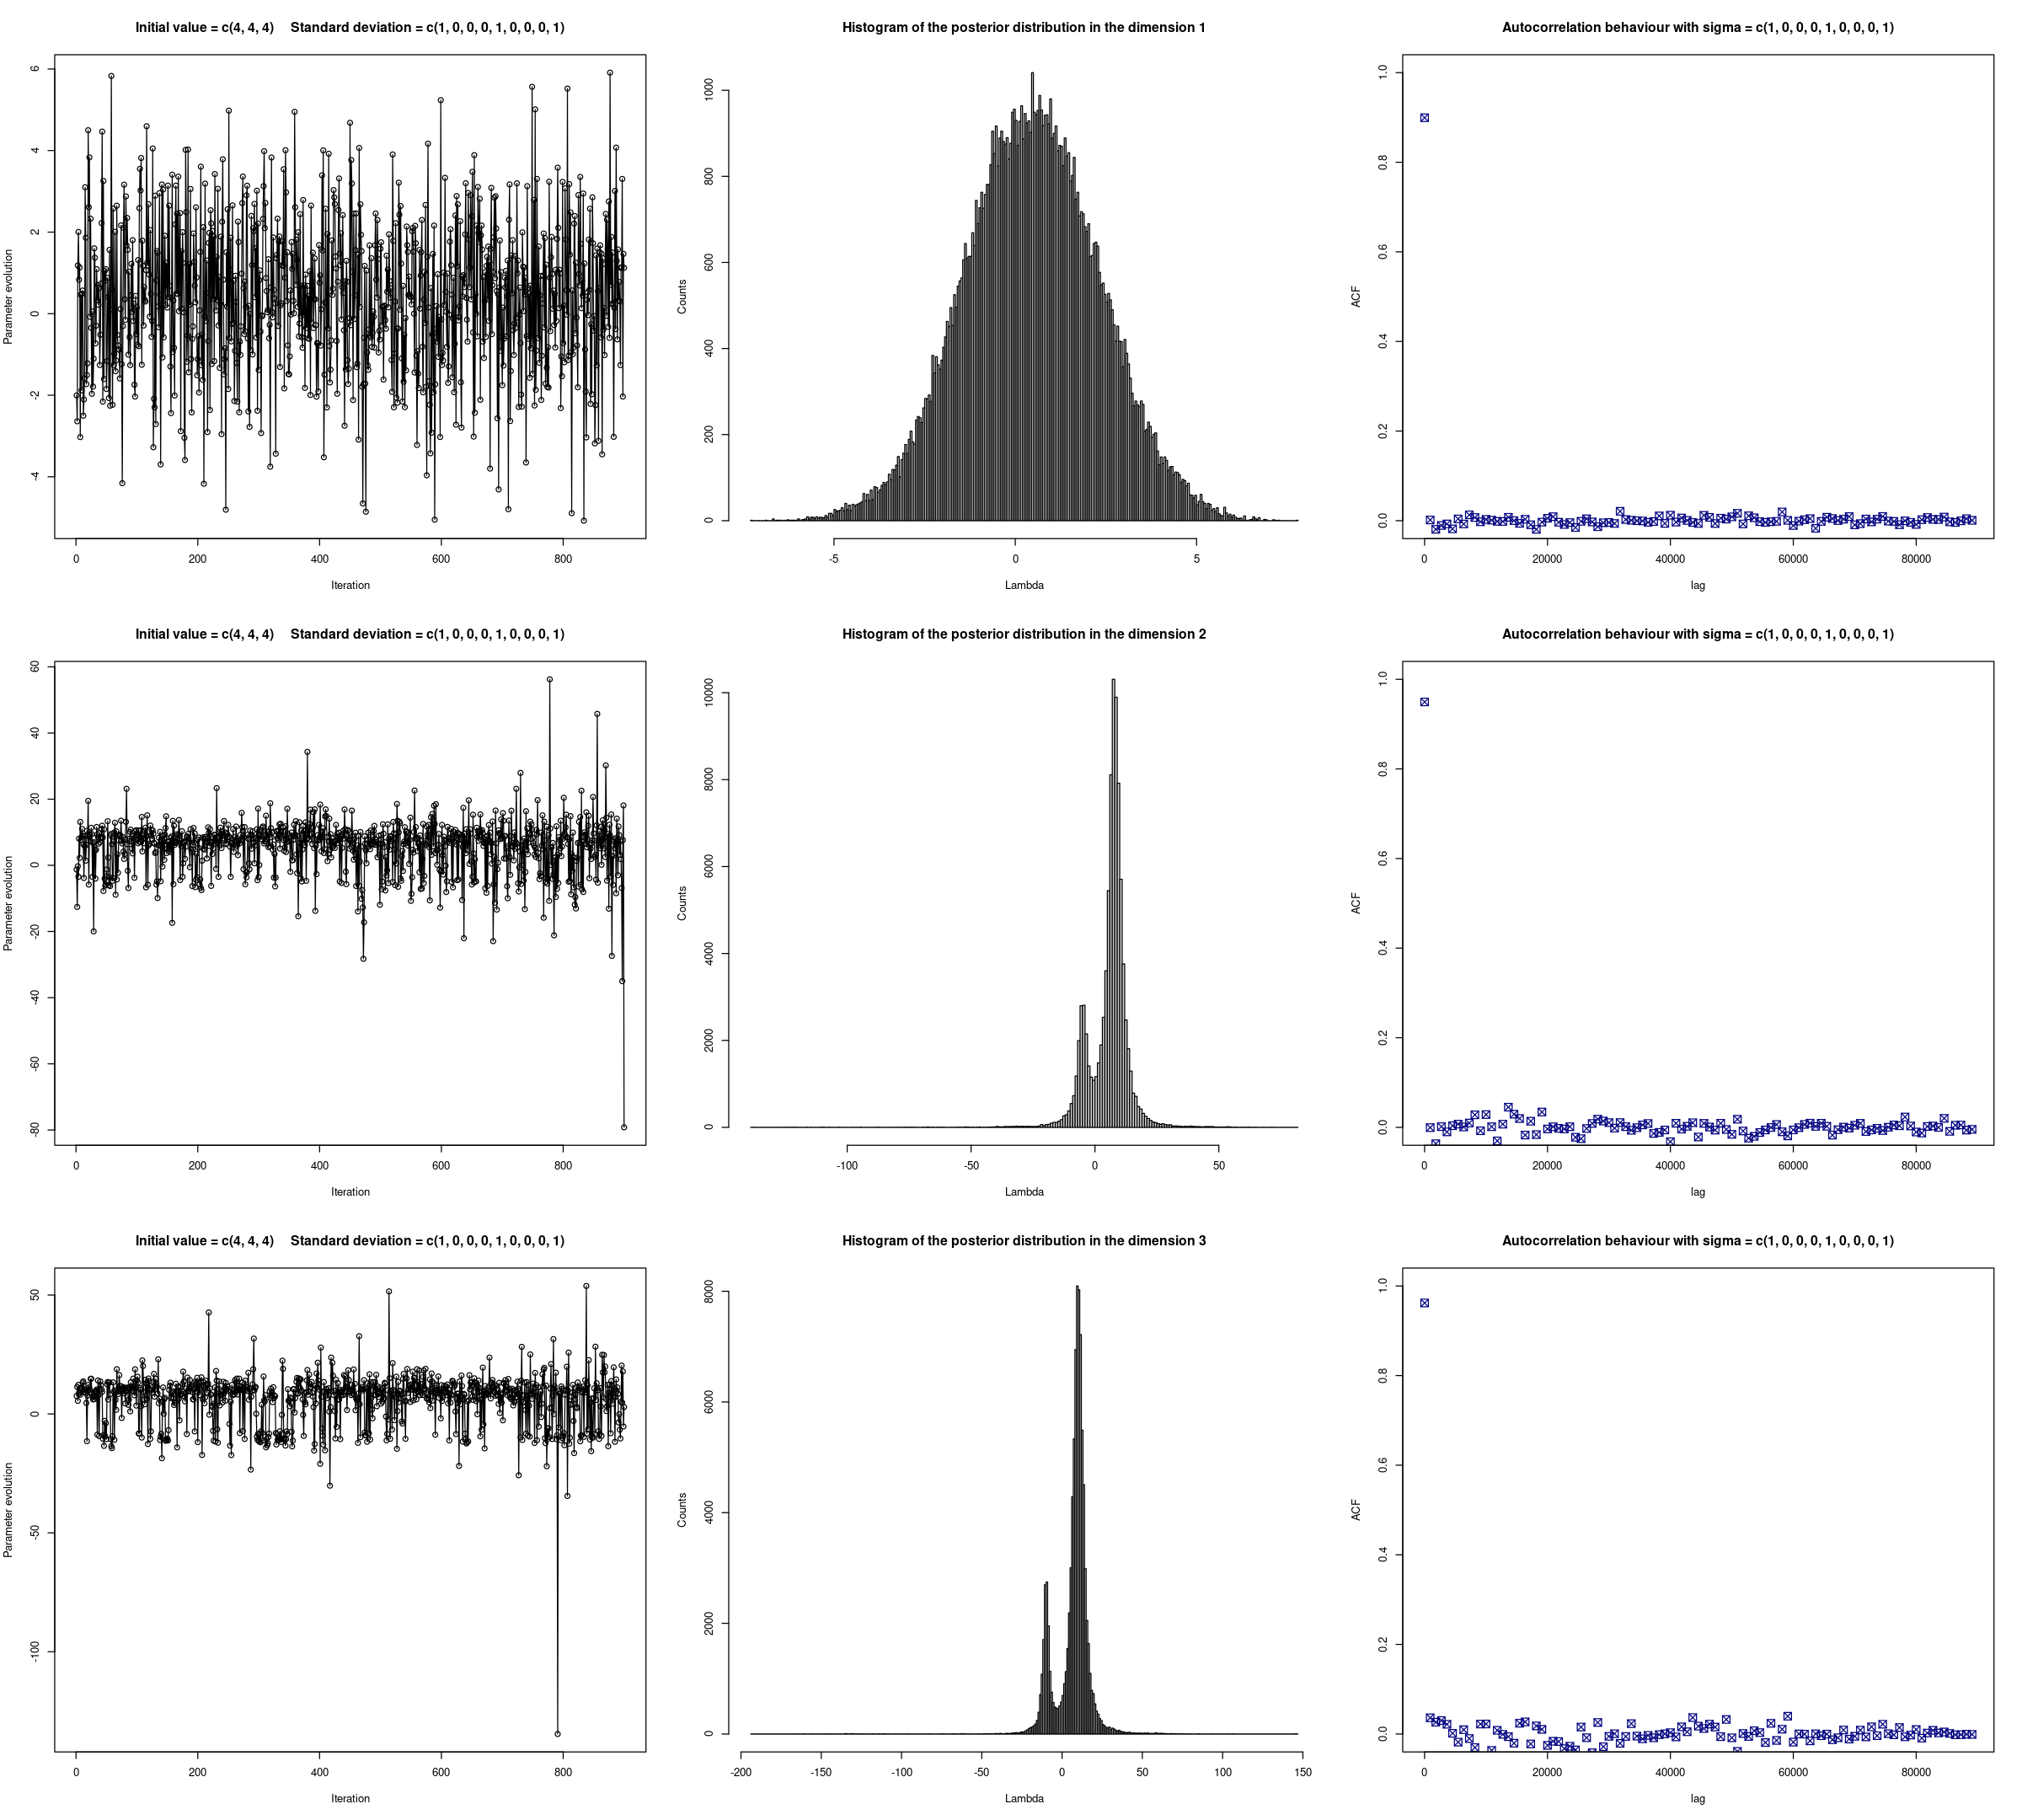

In [14]:
# GLOBAL GIBBS

mcmc_g = random_steps_global_gibbs (func_wanted = chosen_function, theta_init = init, n_samples = N_tot, sigma = std, print_accept=TRUE, t_0 = burn_in,
                                gamma_function = gamma_series_exp, halved_step = burn_in)

mcmc_g = mcmc_g[burn_in:N, ]

show_results(mcmc = mcmc_g, init = init, std = std, step = print_step)